In [ ]:
import cv2
import numpy as np
import sys

IMG_PATH = "E:\Indian_Number_Plates\Sample_Images\Datacluster_number_plates (55).jpg"

def show(title, img):
    cv2.imshow(title, img)
    k = cv2.waitKey(0) & 0xFF
    if k in (27, ord('q')):  # ESC or q to quit anytime
        cv2.destroyAllWindows()
        sys.exit(0)

def main():
    img = cv2.imread(IMG_PATH)
    if img is None:
        print("Failed to read image"); return

    # Ensure a manageable size for display
    h, w = img.shape[:2]
    scale = 720.0 / min(h, w)
    if scale > 1.0:
        scale = 1.0
    img = cv2.resize(img, (int(w*scale), int(h*scale)), interpolation=cv2.INTER_AREA)

    show("Original", img)

    # Prepare a same‑size second image for binary/logical ops
    # Here we make a simple synthetic mask (circle + rectangle) for clarity
    mask = np.zeros(img.shape[:2], dtype=np.uint8)
    cv2.circle(mask, (mask.shape[1]//3, mask.shape[0]//2), min(mask.shape)//6, 255, -1)
    cv2.rectangle(mask, (int(mask.shape[1]*0.55), int(mask.shape[0]*0.35)),
                         (int(mask.shape[1]*0.9),  int(mask.shape[0]*0.75)), 255, -1)

    # Arithmetic operations
    # 1) Add scalar (brightness up) with clipping
    add_scalar = cv2.add(img, (40, 40, 40, 0))
    show("Arithmetic: add +40", add_scalar)

    # 2) Subtract scalar (darken)
    sub_scalar = cv2.subtract(img, (40, 40, 40, 0))
    show("Arithmetic: subtract 40", sub_scalar)

    # 3) Weighted sum (image blending): 0.7*img + 0.3*gaussianBlur
    blur = cv2.GaussianBlur(img, (11,11), 0)
    blend = cv2.addWeighted(img, 0.7, blur, 0.3, 0)
    show("Arithmetic: addWeighted 0.7*img + 0.3*blur", blend)

    # 4) Multiply (contrast scaling) in float then clip
    mul = cv2.convertScaleAbs(img, alpha=1.3, beta=0)  # alpha: gain
    show("Arithmetic: multiply (alpha=1.3)", mul)

    # 5) Divide (attenuate) protect zeros via add constant
    # Convert to float for safe division and scale back
    img_f = img.astype(np.float32) + 1.0
    div = np.clip((img_f / 1.2), 0, 255).astype(np.uint8)
    show("Arithmetic: divide (/1.2)", div)

    # Logical operations (work on single‑channel masks or apply channel‑wise)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    _, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

    # Ensure masks are single‑channel uint8 with 0/255 values
    m1 = thresh
    m2 = mask

    # 6) AND: common region
    and_mask = cv2.bitwise_and(m1, m2)
    show("Logical: AND (Otsu ∧ synthetic)", and_mask)

    # 7) OR: union
    or_mask = cv2.bitwise_or(m1, m2)
    show("Logical: OR (Otsu ∪ synthetic)", or_mask)

    # 8) XOR: exclusive difference
    xor_mask = cv2.bitwise_xor(m1, m2)
    show("Logical: XOR (Otsu ⊕ synthetic)", xor_mask)

    # 9) NOT: invert
    not_mask = cv2.bitwise_not(m1)
    show("Logical: NOT (¬Otsu)", not_mask)

    # Apply logical mask to the color image (example: AND result as alpha)
    and_applied = cv2.bitwise_and(img, img, mask=and_mask)
    show("Logical AND applied to image", and_applied)

    cv2.destroyAllWindows()

if __name__ == "__main__":
    main()


<>:5: SyntaxWarning: invalid escape sequence '\I'
<>:5: SyntaxWarning: invalid escape sequence '\I'
C:\Users\ASUS\AppData\Local\Temp\ipykernel_16280\1607429893.py:5: SyntaxWarning: invalid escape sequence '\I'
  IMG_PATH = "E:\Indian_Number_Plates\Sample_Images\Datacluster_number_plates (55).jpg"


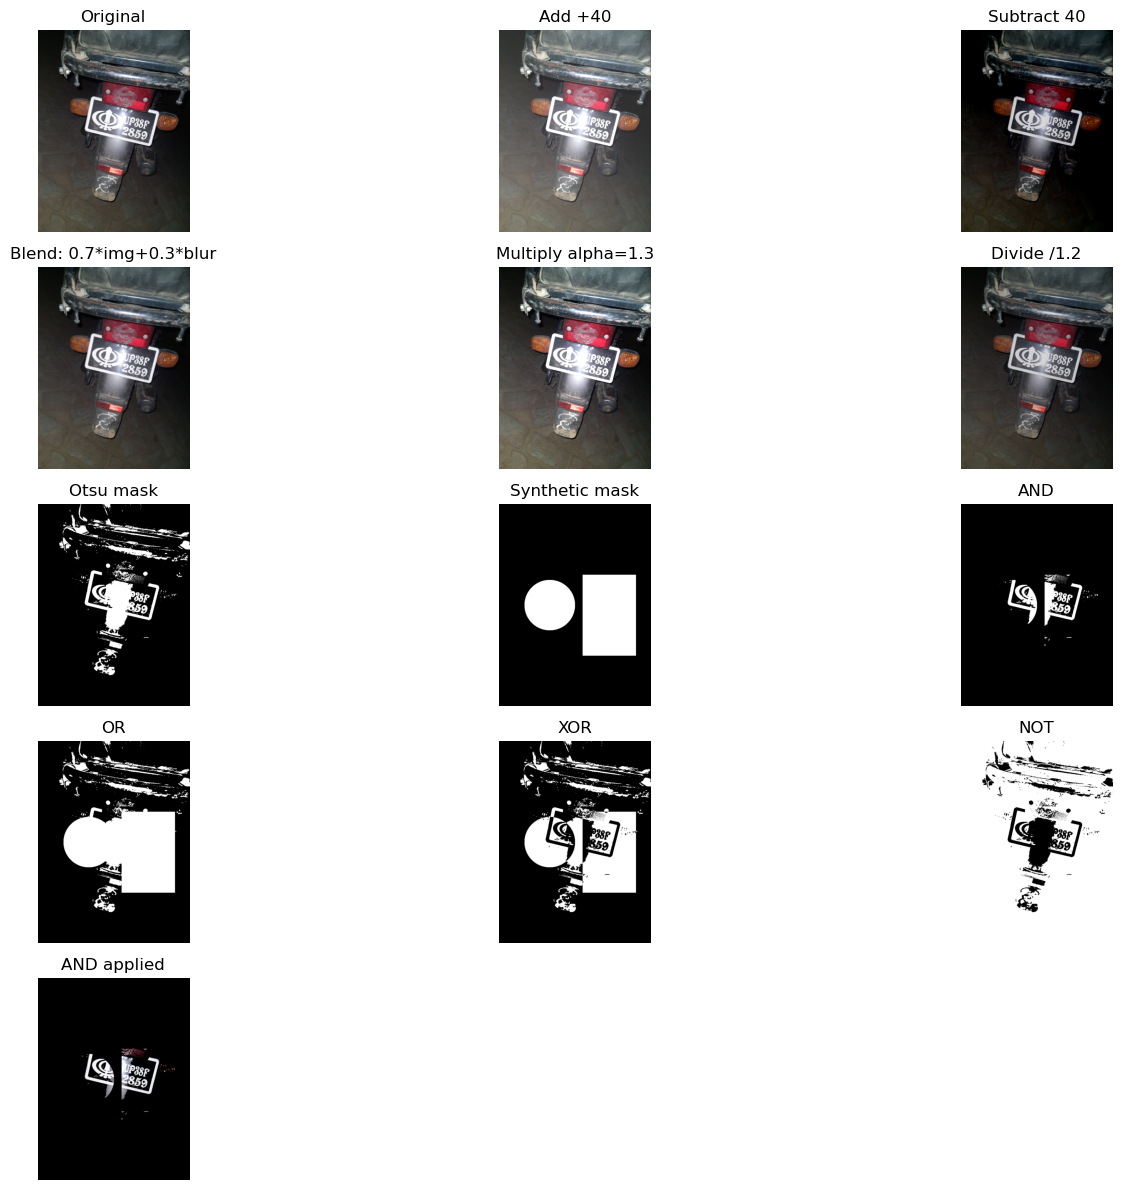

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

IMG_PATH = r"E:\Indian_Number_Plates\Sample_Images\Datacluster_number_plates (55).jpg"

def imshow_row(titles, images, cmap_flags=None, max_cols=3, figsize=(14,8)):
    if cmap_flags is None:
        cmap_flags = [False]*len(images)
    n = len(images)
    cols = min(max_cols, n)
    rows = (n + cols - 1)//cols
    plt.figure(figsize=figsize)
    for i,(title,img,grayflag) in enumerate(zip(titles, images, cmap_flags), 1):
        plt.subplot(rows, cols, i)
        if img.ndim == 3 and not grayflag:
            img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            plt.imshow(img_rgb)
        else:
            plt.imshow(img, cmap='gray')
        plt.title(title); plt.axis('off')
    plt.tight_layout(); plt.show()

def main():
    img = cv2.imread(IMG_PATH)
    if img is None:
        print("Failed to read image"); return

    # Resize for display
    h, w = img.shape[:2]
    scale = 720.0 / min(h, w)
    if scale > 1.0: scale = 1.0
    img = cv2.resize(img, (int(w*scale), int(h*scale)), interpolation=cv2.INTER_AREA)

    # Synthetic mask
    mask = np.zeros(img.shape[:2], dtype=np.uint8)
    cv2.circle(mask, (mask.shape[1]//3, mask.shape[0]//2), min(mask.shape)//6, 255, -1)
    cv2.rectangle(mask, (int(mask.shape[1]*0.55), int(mask.shape[0]*0.35)),
                         (int(mask.shape[1]*0.9),  int(mask.shape[0]*0.75)), 255, -1)

    # Arithmetic
    add_scalar = cv2.add(img, (40, 40, 40, 0))
    sub_scalar = cv2.subtract(img, (40, 40, 40, 0))
    blur = cv2.GaussianBlur(img, (11,11), 0)
    blend = cv2.addWeighted(img, 0.7, blur, 0.3, 0)
    mul = cv2.convertScaleAbs(img, alpha=1.3, beta=0)
    div = np.clip(img.astype(np.float32)/1.2, 0, 255).astype(np.uint8)

    # Logical
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    _, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    and_mask = cv2.bitwise_and(thresh, mask)
    or_mask  = cv2.bitwise_or(thresh, mask)
    xor_mask = cv2.bitwise_xor(thresh, mask)
    not_mask = cv2.bitwise_not(thresh)
    and_applied = cv2.bitwise_and(img, img, mask=and_mask)

    titles = [
        "Original", "Add +40", "Subtract 40",
        "Blend: 0.7*img+0.3*blur", "Multiply alpha=1.3", "Divide /1.2",
        "Otsu mask", "Synthetic mask", "AND", "OR", "XOR", "NOT", "AND applied"
    ]
    images = [
        img, add_scalar, sub_scalar,
        blend, mul, div,
        thresh, mask, and_mask, or_mask, xor_mask, not_mask, and_applied
    ]
    # Mark grayscale plots
    cmap_flags = [False, False, False, False, False, False,
                  True, True, True, True, True, True, False]

    imshow_row(titles, images, cmap_flags, max_cols=3, figsize=(14,12))

if __name__ == "__main__":
    main()


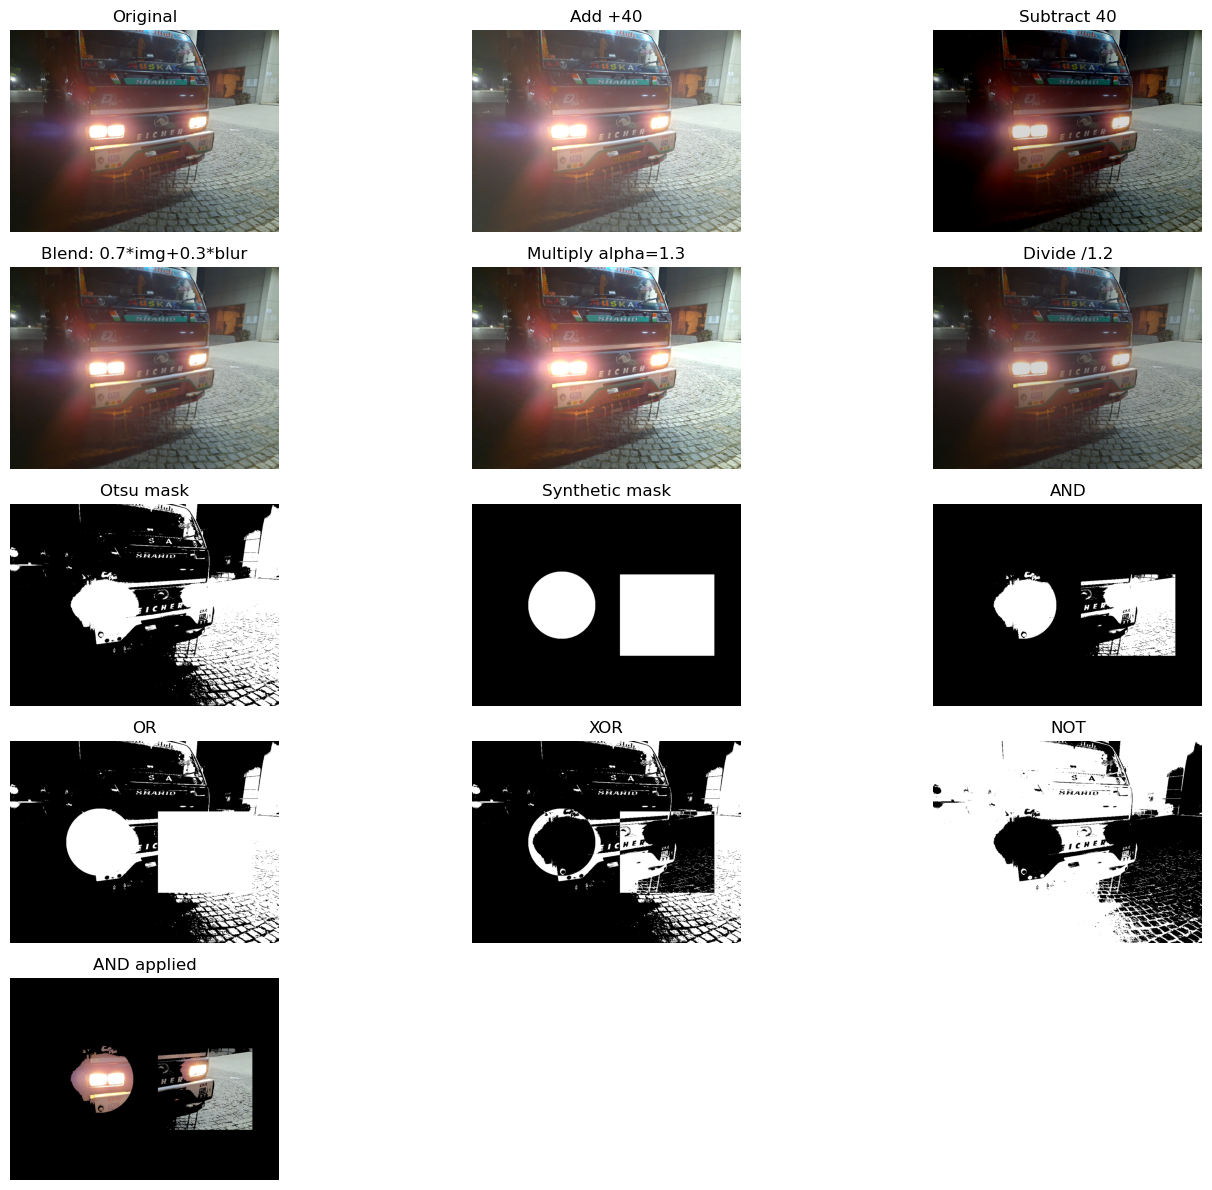

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

IMG_PATH = r"E:\number_plate_images_ocr\number_plate_images_ocr\dc_truck_image_001564_RZeQ1TZR.jpg"

def imshow_row(titles, images, cmap_flags=None, max_cols=3, figsize=(14,8)):
    if cmap_flags is None:
        cmap_flags = [False]*len(images)
    n = len(images)
    cols = min(max_cols, n)
    rows = (n + cols - 1)//cols
    plt.figure(figsize=figsize)
    for i,(title,img,grayflag) in enumerate(zip(titles, images, cmap_flags), 1):
        plt.subplot(rows, cols, i)
        if img.ndim == 3 and not grayflag:
            img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            plt.imshow(img_rgb)
        else:
            plt.imshow(img, cmap='gray')
        plt.title(title); plt.axis('off')
    plt.tight_layout(); plt.show()

def main():
    img = cv2.imread(IMG_PATH)
    if img is None:
        print("Failed to read image"); return

    # Resize for display
    h, w = img.shape[:2]
    scale = 720.0 / min(h, w)
    if scale > 1.0: scale = 1.0
    img = cv2.resize(img, (int(w*scale), int(h*scale)), interpolation=cv2.INTER_AREA)

    # Synthetic mask
    mask = np.zeros(img.shape[:2], dtype=np.uint8)
    cv2.circle(mask, (mask.shape[1]//3, mask.shape[0]//2), min(mask.shape)//6, 255, -1)
    cv2.rectangle(mask, (int(mask.shape[1]*0.55), int(mask.shape[0]*0.35)),
                         (int(mask.shape[1]*0.9),  int(mask.shape[0]*0.75)), 255, -1)

    # Arithmetic
    add_scalar = cv2.add(img, (40, 40, 40, 0))
    sub_scalar = cv2.subtract(img, (40, 40, 40, 0))
    blur = cv2.GaussianBlur(img, (11,11), 0)
    blend = cv2.addWeighted(img, 0.7, blur, 0.3, 0)
    mul = cv2.convertScaleAbs(img, alpha=1.3, beta=0)
    div = np.clip(img.astype(np.float32)/1.2, 0, 255).astype(np.uint8)

    # Logical
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    _, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    and_mask = cv2.bitwise_and(thresh, mask)
    or_mask  = cv2.bitwise_or(thresh, mask)
    xor_mask = cv2.bitwise_xor(thresh, mask)
    not_mask = cv2.bitwise_not(thresh)
    and_applied = cv2.bitwise_and(img, img, mask=and_mask)

    titles = [
        "Original", "Add +40", "Subtract 40",
        "Blend: 0.7*img+0.3*blur", "Multiply alpha=1.3", "Divide /1.2",
        "Otsu mask", "Synthetic mask", "AND", "OR", "XOR", "NOT", "AND applied"
    ]
    images = [
        img, add_scalar, sub_scalar,
        blend, mul, div,
        thresh, mask, and_mask, or_mask, xor_mask, not_mask, and_applied
    ]
    # Mark grayscale plots
    cmap_flags = [False, False, False, False, False, False,
                  True, True, True, True, True, True, False]

    imshow_row(titles, images, cmap_flags, max_cols=3, figsize=(14,12))

if __name__ == "__main__":
    main()


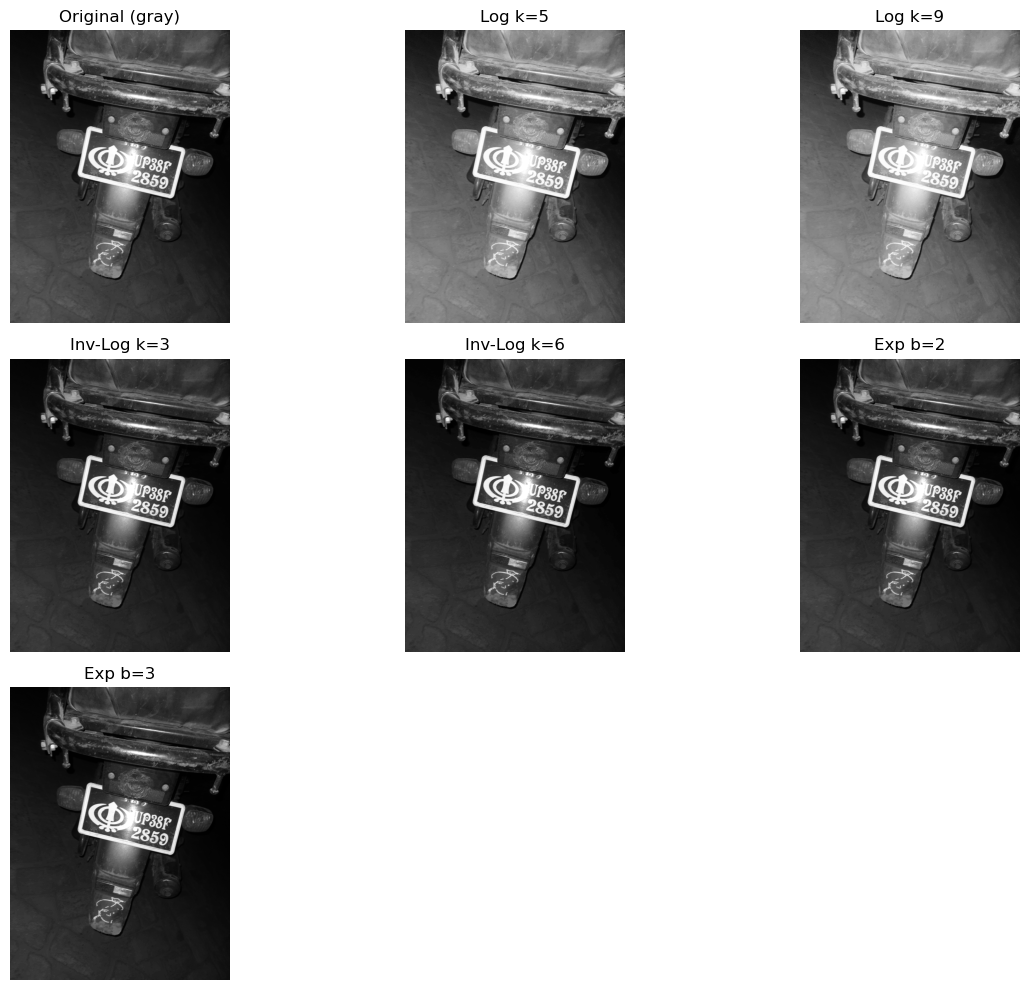

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

IMG_PATH = r"E:\Indian_Number_Plates\Sample_Images\Datacluster_number_plates (55).jpg"

def show_grid(titles, imgs, max_cols=3, figsize=(12,8)):
    n = len(imgs); cols = min(max_cols, n); rows = (n+cols-1)//cols
    plt.figure(figsize=figsize)
    for i,(t,img) in enumerate(zip(titles, imgs), 1):
        plt.subplot(rows, cols, i)
        plt.imshow(img, cmap='gray'); plt.title(t); plt.axis('off')
    plt.tight_layout(); plt.show()

def to_gray_resized(path):
    bgr = cv2.imread(path)
    if bgr is None: raise FileNotFoundError(path)
    h,w = bgr.shape[:2]
    scale = 720.0/min(h,w);  scale = min(1.0, scale)
    bgr = cv2.resize(bgr, (int(w*scale), int(h*scale)), interpolation=cv2.INTER_AREA)
    return cv2.cvtColor(bgr, cv2.COLOR_BGR2GRAY)

def log_transform(img, k=1.0):
    # f in [0,1], g = log(1 + k*f) normalized back to 0..255
    f = img.astype(np.float32)/255.0
    g = np.log1p(k*f)                   # log(1 + kf)
    g = cv2.normalize(g, None, 0, 255, cv2.NORM_MINMAX)
    return g.astype(np.uint8)

def inverse_log_transform(img, k=1.0):
    # Inverse of log: g = (exp(f_scaled) - 1)/k
    f = img.astype(np.float32)/255.0
    # map to a range compatible with exp; use simple scaling
    f_scaled = f * 1.0                  # tune if needed
    g = (np.expm1(f_scaled)) / max(k,1e-6)
    g = np.clip(g, 0, 1)
    return (g*255).astype(np.uint8)

def exponential_transform(img, a=1.0, b=2.0):
    # g = a * (b^(f) - 1), then normalize
    f = img.astype(np.float32)/255.0
    g = a * (np.power(b, f) - 1.0)
    g = cv2.normalize(g, None, 0, 255, cv2.NORM_MINMAX)
    return g.astype(np.uint8)

def main():
    gray = to_gray_resized(IMG_PATH)

    # Log transform variants
    log1 = log_transform(gray, k=5.0)     # stronger brightening of darks
    log2 = log_transform(gray, k=9.0)

    # Inverse-log (antilog)
    invlog1 = inverse_log_transform(gray, k=3.0)
    invlog2 = inverse_log_transform(gray, k=6.0)

    # Exponential transform (nonlinear darkening of highlights)
    exp1 = exponential_transform(gray, a=1.0, b=2.0)
    exp2 = exponential_transform(gray, a=1.0, b=3.0)

    show_grid(
        ["Original (gray)", "Log k=5", "Log k=9",
         "Inv-Log k=3", "Inv-Log k=6",
         "Exp b=2", "Exp b=3"],
        [gray, log1, log2, invlog1, invlog2, exp1, exp2],
        max_cols=3, figsize=(12,10)
    )

if __name__ == "__main__":
    main()
